In [43]:
# importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import ImageGrid
import copy
import random
import pandas as pd
import math
import scipy
from scipy.stats import norm, expon
from scipy.linalg import null_space
import pandas as pd
import matplotlib as mpl

import os
cwd = os.getcwd()

In [47]:
data_import = pd.read_csv(cwd+"/Gdi/Gdi_2-state_track_2/Gdi_delta_y2.csv",
                          delimiter=',', index_col=0)
delta_y_A = np.array(data_import).flatten()

data_import = pd.read_csv(cwd+"/Rab11/Rab11_2-state_track_8_ALPHA=0.3/Rab11_delta_y8.csv",
                          delimiter=',', index_col=0)
delta_y_B = np.array(data_import).flatten()

data_import = pd.read_csv(cwd+"/Rab11/Rab11_2-state_track_7_ALPHA=0.3/Rab11_delta_y7.csv",
                          delimiter=',', index_col=0)
delta_y_C = np.array(data_import).flatten()

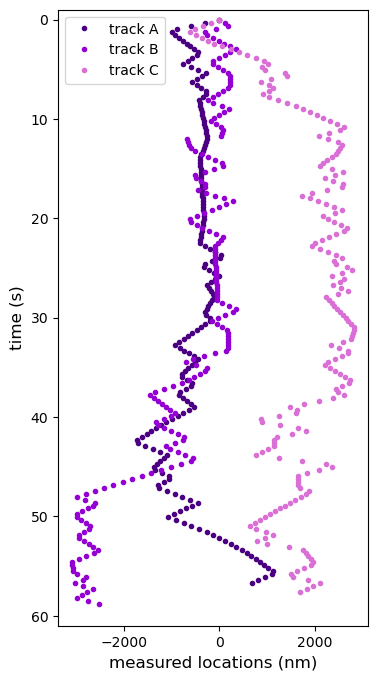

In [74]:
NA = delta_y_A.shape[0]
rebuild_y_A = np.zeros(NA+1)
for i in range(1, NA+1):
    rebuild_y_A[i] += rebuild_y_A[i-1] + delta_y_A[i-1]
    
NB = delta_y_B.shape[0]
rebuild_y_B = np.zeros(NB+1)
for i in range(1, NB+1):
    rebuild_y_B[i] += rebuild_y_B[i-1] + delta_y_B[i-1]
    
NC = delta_y_C.shape[0]
rebuild_y_C = np.zeros(NC+1)
for i in range(1, NC+1):
    rebuild_y_C[i] += rebuild_y_C[i-1] + delta_y_C[i-1]
    
plt.figure(figsize=(4,8))
plt.plot(rebuild_y_A,delta_t*np.arange(0,NA+1), '.', label='track A', color='indigo', alpha=1)
plt.plot(rebuild_y_B,delta_t*np.arange(0,NB+1), '.', label='track B', color='darkviolet', alpha=1)
plt.plot(rebuild_y_C,delta_t*np.arange(0,NC+1), '.', label='track C', color='orchid', alpha=1)
plt.xlabel(r'measured locations (nm)', fontsize=12)
plt.ylabel(r'time (s)', fontsize=12)
plt.ylim([-1,61])
plt.xticks([-2000,0,2000])
plt.gca().invert_yaxis()
plt.legend(fontsize=10)
plt.savefig('compare_y_plot_tracks.png', format="png", dpi=1200, bbox_inches="tight")
plt.show()